
# An Exploration of Variance Reduction Techniques for Pricing European and Asian Options
## The University of Chicago, Department of Statistics
## Jesse Freitag
## jfreitag@uchicago.edu

# Asian Option Using Classical Monte Carlo

In [39]:
#### Below is the helper code for the paper.

In [36]:
import numpy as np
import matplotlib.pyplot as plt



def asian_call_option_price_mc(S0, K, T, sigma, r, num_iterations):
    dt = 1.0 / 504  # Assuming trading days
    N = int(T / dt)
    option_prices = []
    for _ in range(num_iterations):
        S_t = S0
        avg_price = S0
        for _ in range(N):
            z = np.random.normal(0, 1)
            S_t *= np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z)
            avg_price +=S_t
        
        avg_price /=(N+1)
        payoff = max(0, avg_price - K)
        option_prices.append(np.exp(-r * T) * payoff)
    
    option_price = np.mean(option_prices)
    standard_error = np.std(option_prices, ddof=1) / np.sqrt(num_iterations)
    return option_prices, option_price, standard_error

# Parameters
sigma = 0.3
T = 1
r = 0.08
K = 100
S0 = 101
num_iterations = 100000


# Computing option price
option_prices_classic, option_price_classical,standard_error = asian_call_option_price_mc(S0, K, T, sigma, r, num_iterations)
print("Asian Call Option Price using Classical Monte Carlo:", option_price_classical)
print('Standard Error of Asian Call Options using Classical Monte Carlo', standard_error)


Asian Call Option Price using Classical Monte Carlo: 9.168867522759893
Standard Error of Asian Call Options using Classical Monte Carlo 0.04010863314477719


# Asian Option using Antithetic Variates

In [37]:
import numpy as np

def asian_call_option_mc_convergence_antithetic(S0, K, T, sigma, r, num_iterations):
    dt = 1.0 / 504  # Assuming trading days
    N = int(T / dt)
    option_prices = []
    
    for _ in range(num_iterations):
        S_t1 = S0
        S_t2 = S0
        avg_price1 = S0
        avg_price2 = S0
        for _ in range(N):
            z1 = np.random.normal(0, 1)
            z2 = -z1  # Antithetic variate
            S_t1 *= np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z1)
            S_t2 *= np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z2)

            avg_price1 += S_t1
            avg_price2 += S_t2
        avg_price1 /= (N + 1)
        avg_price2 /= (N + 1)
        payoff1 = max(0, avg_price1 - K)
        payoff2 = max(0, avg_price2 - K)
        option_prices.append(0.5 * (np.exp(-r * T) * payoff1 + np.exp(-r * T) * payoff2))
    
    option_price = np.mean(option_prices)
    standard_error = np.std(option_prices, ddof=1) / np.sqrt(num_iterations)
    return option_prices, option_price, standard_error

# Parameters
sigma = 0.3
T = 1
r = 0.08
K = 100
S0 = 101
num_iterations = 100000

# Calculate Asian call option price using Antithetic Variate
option_prices_av,option_price_av, standard_error = asian_call_option_mc_convergence_antithetic(S0, K, T, sigma, r, num_iterations)

# Print results
print("Asian Call Option Price using Antithetic Variates:", option_price_av)
print("Standard Error using Antithetic Variates:", standard_error)

Asian Call Option Price using Antithetic Variates: 9.218614856072154
Standard Error using Antithetic Variates: 0.019861964509090346


# Comparison of Convergence

Text(0.5, 1.0, 'Convergence of Asian Call Option Price')

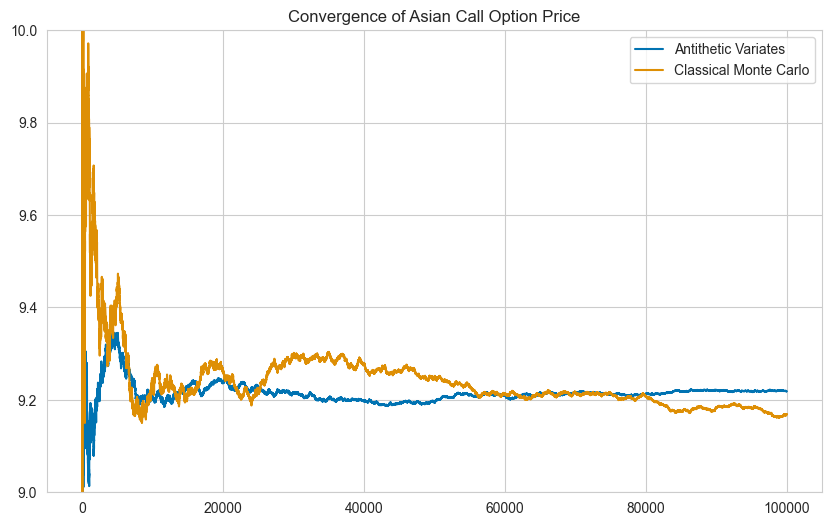

In [38]:
cumulative_average_AV = np.cumsum(option_prices_av) / np.arange(1, num_iterations + 1)
cumulative_average_CLASSIC = np.cumsum(option_prices_classic) / np.arange(1, num_iterations+ 1)

plt.figure(figsize = (10,6))
plt.plot(cumulative_average_AV , label = 'Antithetic Variates')
plt.plot(cumulative_average_CLASSIC, label = 'Classical Monte Carlo')

plt.ylim((9,10))
plt.legend()
plt.title('Convergence of Asian Call Option Price')

-------------------------------------------------

# European Call Estimation with Classical Monte Carlo

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def european_call_mc_convergence(S, K, T, volatility, r, num_steps, num_simulations):
    dt = T / num_steps
    option_prices = []
    
    for _ in range(num_simulations):
        S_t = S
        for _ in range(num_steps):
            z = np.random.normal(0, 1)
            S_t *= np.exp((r - 0.5 * volatility**2) * dt + volatility * np.sqrt(dt) * z)
        payoff = max(0, S_t - K)
        option_prices.append(np.exp(-r * T) * payoff)
    standard_error = np.std(option_prices, ddof=1) / np.sqrt(num_simulations)
    price = np.mean(option_prices)
    return price , option_prices, standard_error

# Parameters
S = 101  # Initial stock price
K = 100  # Strike price
T = 1    # Time to maturity
volatility = 0.30  # Volatility
r = 0.08  # Risk-free rate
num_steps = 252  # Number of steps
num_simulations = 100000  # Number of simulations

# Calculate option prices for convergence
price, option_prices_convergence,standard_error = european_call_mc_convergence(S, K, T, volatility, r, num_steps, num_simulations)


cumulative_average_MC = np.cumsum(option_prices_convergence) / np.arange(1, num_simulations + 1)

# Print final option price
option_price = np.mean(option_prices_convergence)
standard_error = np.std(option_prices_convergence, ddof=1) / np.sqrt(num_simulations)
print("European Call Option Price using Classical MC:", option_price)
print("Standard Error:", standard_error)


European Call Option Price using Classical MC: 16.37178732220698
Standard Error: 0.07557643090876405


# Antithetic Variate for European Call Option

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def european_call_mc_convergence_antithetic(S, K, T, volatility, r, num_steps, num_simulations):
    dt = T / num_steps
    option_prices = []
    
    for _ in range(num_simulations):
        S_t1 = S
        S_t2 = S
        for _ in range(num_steps):
            z1 = np.random.normal(0, 1)
            z2 = -z1  # Antithetic variate
            S_t1 *= np.exp((r - 0.5 * volatility**2) * dt + volatility * np.sqrt(dt) * z1)
            S_t2 *= np.exp((r - 0.5 * volatility**2) * dt + volatility * np.sqrt(dt) * z2)
        payoff1 = max(0, S_t1 - K)
        payoff2 = max(0, S_t2 - K)
        option_prices.append(0.5 * (np.exp(-r * T) * payoff1 + np.exp(-r * T) * payoff2))
    
    standard_error = np.std(option_prices, ddof=1) / np.sqrt(num_simulations)
    price = np.mean(option_prices)
    return price, option_prices, standard_error

# Parameters
S = 101  # Initial stock price
K = 100  # Strike price
T = 1    # Time to maturity
volatility = 0.30  # Volatility
r = 0.08  # Risk-free rate
num_steps = 252  # Number of steps
num_simulations = 100000  # Number of simulations

# Calculate option prices for convergence
price, option_prices_convergence,standard_error = european_call_mc_convergence_antithetic(S, K, T, volatility, r, num_steps, num_simulations)


cumulative_average_AV = np.cumsum(option_prices_convergence) / np.arange(1, num_simulations + 1)


# Print final option price
option_price = np.mean(option_prices_convergence)
standard_error = np.std(option_prices_convergence, ddof=1) / np.sqrt(num_simulations)
print("European Call Option Price using Antithetic Variates:", option_price)
print("Standard Error:", standard_error)


European Call Option Price using Antithetic Variates: 16.379810807011697
Standard Error: 0.038792818863038404


# Control Variates for European Call Option - Delta-based Control Variates

The probability distribution of the payoff of an option after delta hedging has smaller standard deviation compared to its portfolio's unhedged counter part. To quickly see this, denote option payoff without delta hedging as $V_{RAW}$ and option payoff using delta hedging as $V_{\Delta}$. Without delta hedging, $V_{RAW}$ follows a certain probability distribution, $f_{V_{RAW}}(S_t)$, with mean $\mu_{V_{RAW}}$ and standard deviation $\sigma_{V_{RAW}}$, and $V_{\Delta}$  similarly. After delta hedging, the portfolio's pay-off is a combination of the option pay-off and the pay-off from the delta-hedged position in the underlying asset. The pay-off from the delta-hedged position in the underlying asset is designed to offset the changes in the option's value due to small movements in the underlying's price. Therefore, it introduces a certain level of certainty into the pay-off. Claiming $\sigma_{V_{RAW}} < \sigma_{V_{\Delta}}$, by delta hedging, we introduce a hedge that is designed to offset the fluctuations in the option's value due to small changes in the underlying asset's price. This hedge effectively reduces the overall risk (standard deviation) of the portfolio.\\~\\

We define a Delta-based martingale Control Variate ($cv_{\Delta}$) below:

$$cv_{\Delta} = \sum_{i=0}^{N-1} \frac{\partial C_{t_i}}{\partial S} \left( S_{t_{i+1}} - \mathbb{E}[S_{t_i}]\right)\text{exp } r (T - t_{i+1}) $$

The forward payoff, therefore, is
$$C_{t_0} \text{exp }rT = C_T - cv_{\Delta} + \eta \;  \; \; \;\text{ where $\eta$ is an error term}$$

In words, the above is the forward payoff at time $T$ is the option payoff at time $T$ minus the discrete rebalancing plus an error term.



The control variate technique for options simulates the difference $\hat{C} -\beta cv^*$ where $\beta$ is a constant. Ideally, the control variate should by highly correlated with $C$ but cheaper to compute. The scaling factor $\beta$, should be chosen such that the variance of the difference is minimized. 

Delta, denoted as $\frac{\partial C}{\partial S}$, is simply the amount the option price changes for a change of $1 in the underlying asset.

We want to use delta as a control variate because delta is perfect correlation (1 to 1) to the option price, hence why we will choose $\beta = -1$ as the coefficient of the delta-based control variate.

In [24]:
import numpy as np
from py_vollib.black_scholes.implied_volatility import implied_volatility as iv
from py_vollib.black_scholes import black_scholes as bs
from py_vollib.black_scholes.greeks.analytical import vega, delta

def control_variates_monte_carlo(S, K, T, volatility, r, num_steps, num_simulations, beta1):
    # Precompute constants
    N = num_steps
    dt = T/N
    nudt = (r - 0.5*volatility**2)*dt
    volsdt = volatility*np.sqrt(dt)
    erdt = np.exp(r*dt)

    # Standard Error Placeholders
    sum_CT = 0
    sum_CT2 = 0

    option_prices = []
    # Monte Carlo Method
    for i in range(num_simulations):
        St = S
        cv = 0
        for j in range(N):
            epsilon = np.random.normal()
            deltaSt = delta('c', St, K, T-j*dt, r, volatility)
            Stn = St*np.exp( nudt + volsdt*epsilon )
            cv = cv + deltaSt*(Stn - St*erdt)
            St = Stn

        CT = max(0, St - K) + beta1*cv
        option_prices.append(np.exp(-r*T)*CT)
        sum_CT = sum_CT + CT
        sum_CT2 = sum_CT2 + CT*CT

    # Compute Expectation and SE
    C0 = np.exp(-r*T)*sum_CT/num_simulations
    sigma = np.sqrt( (sum_CT2 - sum_CT*sum_CT/num_simulations)*np.exp(-2*r*T) / (num_simulations-1) )
    SE = sigma/np.sqrt(num_simulations)

    return C0, SE, option_prices

# Example usage:
S = 101  # Initial stock price
K = 100  # Strike price
T = 1    # Time to maturity
volatility = 0.30  # Volatility
r = 0.08  # Risk-free rate
num_steps = 252  # Number of steps
num_simulations = 100000  # Number of simulations
beta1 = -1  # Coefficient for the control variate

call_value, SE, option_prices_CV_delta = control_variates_monte_carlo(S, K, T, volatility, r, num_steps, num_simulations, beta1)
print("Call value is ${0} with SE +/- {1}".format(np.round(call_value, 2), np.round(SE, 3)))

cumulative_average_CV_delta = np.cumsum(option_prices_CV_delta) / np.arange(1, num_simulations + 1)

Call value is $16.38 with SE +/- 0.004


# Gamma based CV

In [25]:
from py_vollib.black_scholes.greeks.analytical import vega, delta,gamma

Call value is $16.41 with SE +/- 0.075


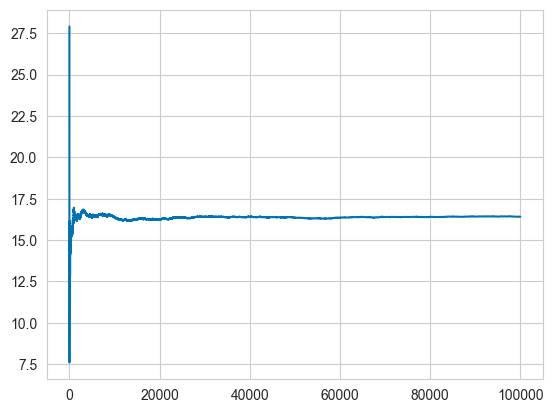

In [26]:
import numpy as np
from py_vollib.black_scholes.implied_volatility import implied_volatility as iv
from py_vollib.black_scholes import black_scholes as bs
from py_vollib.black_scholes.greeks.analytical import vega, delta
import scipy.stats as stats

def gamma_calc(r, S, K, T, sigma):
    "Calculate delta of an option"
    d1 = (np.log(S/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
    try:
        gamma_calc = stats.norm.pdf(d1, 0, 1)/(S*sigma*np.sqrt(T))
        return gamma_calc
    except:
        print("Please confirm option type, either 'c' for Call or 'p' for Put!")
        
# Example usage:
S = 101  # Initial stock price
K = 100  # Strike price
T = 1    # Time to maturity
vol = 0.30  # Volatility
r = 0.08  # Risk-free rate
N = 252  # Number of steps
M = 100000  # Number of simulations
beta1 = -.5  # Coefficient for the control variate


#precompute constants
dt = T/N
nudt = (r - 0.5*vol**2)*dt
volsdt = vol*np.sqrt(dt)
erdt = np.exp(r*dt)
ergamma = np.exp((2*r+vol**2)*dt) - 2*erdt + 1
beta2 = -0.5
# Monte Carlo Method
Z = np.random.normal(size=(N, M)) 
delta_St = nudt + volsdt*Z
ST = S*np.cumprod( np.exp(delta_St), axis=0)
ST = np.concatenate( (np.full(shape=(1, M), fill_value=S), ST ) )
gammaSt = gamma_calc(r, ST[:-1].T, K, np.linspace(T,dt,N), vol).T
cv2 = np.cumsum(gammaSt*((ST[1:] - ST[:-1])**2 - ergamma*ST[:-1]**2), axis=0)
CT = np.maximum(0, ST[-1] - K) + beta2*cv2[-1]
C0_gv = np.exp(-r*T)*np.sum(CT)/M
sigma = np.sqrt( np.sum( (np.exp(-r*T)*CT - C0_gv)**2) / (M-1) )
sigma = np.std(np.exp(-r*T)*CT)
SE_gv = sigma/np.sqrt(M)

print("Call value is ${0} with SE +/- {1}".format(np.round(C0_gv,2),np.round(SE_gv,3)))


cumulative_average_CV_gamma = np.cumsum(CT) / np.arange(1, M + 1) * np.exp(-r*T)

# plt.figure(figsize = (10,6))
plt.plot(cumulative_average_CV_gamma)
# plt.legend()

# Combined Antithetic and Delta Variates

So far we have implemented option pricing algorithms using Antithetic Variates, Delta-based Control Variates, and Gamma-based Control Variates. In this section, we will implement and discuss a variance reduction technique that uses two techniques -- both Delta-based Control Variates and Antithetic Variates. We will show that combining these two techniques will yield even further variance reduction for pricing European options. In fact, the final section will implement an algorithm that uses both Delta-based and Gamma-based CV and Antithetic Variates.

In essence, this algorithm computes delta-based control variates using antithetic sampling producing $cv_{\Delta}$ and $\tilde{cv}_{\Delta}$ -- both perfectly negatively correlated underlyings. For the sake of notation, we will define this new control variate by taking the average of the two variates and multiplying by $\beta$ like we did previously:

$$cv_{\Delta, AV} = \beta\frac{(cv_{\Delta} + \tilde{cv}_{\Delta})}{2}$$


In [27]:
import time
import numpy as np
import scipy.stats as stats

start_time = time.time()

def delta_calc(r, S, K, T, sigma, type="c"):
    "Calculate delta of an option"
    d1 = (np.log(S/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
    try:
        if type == "c":
            delta_calc = stats.norm.cdf(d1, 0, 1)
        elif type == "p":
            delta_calc = -stats.norm.cdf(-d1, 0, 1)
        return delta_calc
    except:
        print("Please confirm option type, either 'c' for Call or 'p' for Put!")
        
# Example usage:
S = 101  # Initial stock price
K = 100  # Strike price
T = 1    # Time to maturity
vol = 0.30  # Volatility
r = 0.08  # Risk-free rate
N = 252  # Number of steps
M = 100000  # Number of simulations
beta1 = -1  # Coefficient for the control variate



#precompute constants
dt = T/N
nudt = (r - 0.5*vol**2)*dt
volsdt = vol*np.sqrt(dt)
erdt = np.exp(r*dt)
beta1 = -1
# Monte Carlo Method
Z = np.random.normal(size=(N, M)) 
delta_St1 = nudt + volsdt*Z
delta_St2 = nudt - volsdt*Z
ST1 = S*np.cumprod( np.exp(delta_St1), axis=0)
ST2 = S*np.cumprod( np.exp(delta_St2), axis=0)
ST1 = np.concatenate( (np.full(shape=(1, M), fill_value=S), ST1 ) )
ST2 = np.concatenate( (np.full(shape=(1, M), fill_value=S), ST2 ) )
# Calculate delta for both sets of underlying stock prices
deltaSt1 = delta_calc(r, ST1[:-1].T, K, np.linspace(T,dt,N), vol, "c").T
deltaSt2 = delta_calc(r, ST2[:-1].T, K, np.linspace(T,dt,N), vol, "c").T
# Calculate two sets of delta control variates for negatively correlated assets
cv11 = np.cumsum(deltaSt1*(ST1[1:] - ST1[:-1]*erdt), axis=0)
cv12 = np.cumsum(deltaSt2*(ST2[1:] - ST2[:-1]*erdt), axis=0)
CT = 0.5 * (  np.maximum(0, ST1[-1] - K) + beta1*cv11[-1] 
            + np.maximum(0, ST2[-1] - K) + beta1*cv12[-1] )
C0_adv = np.exp(-r*T)*np.sum(CT)/M
sigma = np.sqrt( np.sum( (np.exp(-r*T)*CT - C0_adv)**2) / (M-1) )
sigma = np.std(np.exp(-r*T)*CT)
SE_adv = sigma/np.sqrt(M)
mc_time_adv = time.time() - start_time
print("Call value is ${0} with SE +/- {1}".format(np.round(C0_adv,2),np.round(SE_adv,3)))
print("Computation time is: ", round(mc_time_adv,4))




Call value is $16.38 with SE +/- 0.002
Computation time is:  7.5011


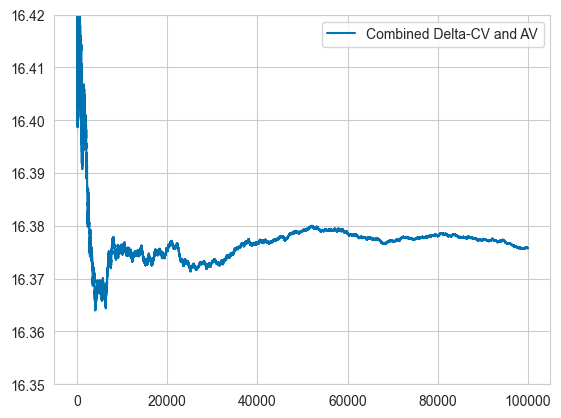

In [28]:
import matplotlib.pyplot as plt
cumulative_average_deltaAV = np.exp(-r*T) * CT.cumsum()/np.arange(1,M+1) 

plt.plot(cumulative_average_deltaAV, label = 'Combined Delta-CV and AV')
plt.ylim((16.35, 16.42))
plt.legend()
plt.show()



# Delta - Gamma - Antithetic Variates sampler

In [29]:
import numpy as np
import time
from scipy.stats import norm
# Example usage:
S = 101  # Initial stock price
K = 100  # Strike price
T = 1    # Time to maturity
vol = 0.30  # Volatility
r = 0.08  # Risk-free rate
N = 252  # Number of steps
M = 100000  # Number of simulations

def delta_calc(r, S, K, T, sigma, type="c"):
    "Calculate delta of an option"
    d1 = (np.log(S/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
    if type == "c":
        delta = norm.cdf(d1)
    elif type == "p":
        delta = -norm.cdf(-d1)
    else:
        raise ValueError("Option type must be either 'c' for Call or 'p' for Put.")
    return delta


def gamma_calc(r, S, K, T, sigma):
    "Calculate gamma of an option"
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma * np.sqrt(T))
    gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
    return gamma
        
#print(delta_calc(r,S,K,T,vol, type = "c"))
start_time = time.time()
#precompute constants
dt = T/N
nudt = (r - 0.5*vol**2)*dt
volsdt = vol*np.sqrt(dt)
erdt = np.exp(r*dt)
ergamma = np.exp((2*r+vol**2)*dt) - 2*erdt + 1
beta1 = -1
beta2 = -0.5
# Monte Carlo Method
Z = np.random.normal(size=(N, M)) 
delta_St1 = nudt + volsdt*Z
delta_St2 = nudt - volsdt*Z
ST1 = S*np.cumprod( np.exp(delta_St1), axis=0)
ST2 = S*np.cumprod( np.exp(delta_St2), axis=0)
ST1 = np.concatenate( (np.full(shape=(1, M), fill_value=S), ST1 ) )
ST2 = np.concatenate( (np.full(shape=(1, M), fill_value=S), ST2 ) )
# Calculate delta for both sets of underlying stock prices
deltaSt1 = delta_calc(r, ST1[:-1].T, K, np.linspace(T,dt,N), vol, 'c').T
deltaSt2 = delta_calc(r, ST2[:-1].T, K, np.linspace(T,dt,N), vol, 'c').T
# Calculate gamma for both sets of underlying stock prices
gammaSt1 = gamma_calc(r, ST1[:-1].T, K, np.linspace(T,dt,N), vol).T
gammaSt2 = gamma_calc(r, ST2[:-1].T, K, np.linspace(T,dt,N), vol).T
# Calculate two sets of delta control variates for negatively correlated assets
cv11 = np.cumsum(deltaSt1*(ST1[1:] - ST1[:-1]*erdt), axis=0)
cv12 = np.cumsum(deltaSt2*(ST2[1:] - ST2[:-1]*erdt), axis=0)
# Calculate two sets of gamma control variates for negatively correlated assets
cv21 = np.cumsum(gammaSt1*((ST1[1:] - ST1[:-1])**2 - ergamma*ST1[:-1]**2), axis=0)
cv22 = np.cumsum(gammaSt2*((ST2[1:] - ST2[:-1])**2 - ergamma*ST2[:-1]**2), axis=0)
CT = 0.5 * (  np.maximum(0, ST1[-1] - K) + beta1*cv11[-1] + beta2*cv21[-1]
            + np.maximum(0, ST2[-1] - K) + beta1*cv12[-1] + beta2*cv22[-1])
C0_adgv = np.exp(-r*T)*np.sum(CT)/M
sigma = np.sqrt( np.sum( (np.exp(-r*T)*CT - C0_adgv)**2) / (M-1) )
sigma = np.std(np.exp(-r*T)*CT)
SE_adgv = sigma/np.sqrt(M)
mc_time_adgv = time.time() - start_time
print("Call value is ${0} with SE +/- {1}".format(np.round(C0_adgv,2),np.round(SE_adgv,3)))
print("Computation time is: ", round(mc_time_adgv,4))

Call value is $16.38 with SE +/- 0.001
Computation time is:  11.5756


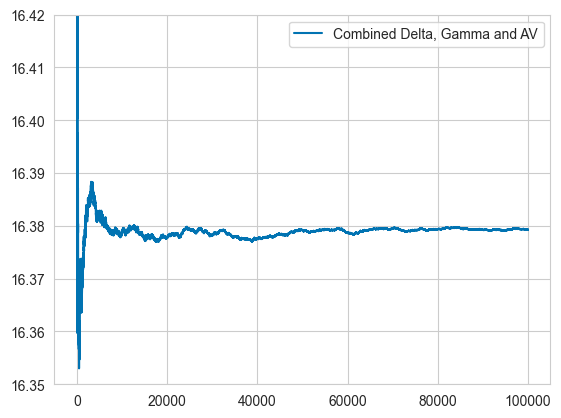

In [30]:
import matplotlib.pyplot as plt
cumulative_average_all3 = np.exp(-r*T) * CT.cumsum()/np.arange(1,M+1) 

plt.plot(cumulative_average_all3, label = 'Combined Delta, Gamma and AV')
plt.ylim((16.35, 16.42))
plt.legend()
plt.show()




# Compute True Black Scholes Price of Option

In [31]:
import math

def black_scholes_call(S, K, T, r, sigma):

    d1 = (math.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)
    call_price = S * norm_cdf(d1) - K * math.exp(-r * T) * norm_cdf(d2)
    return call_price

def norm_cdf(x):
    return (1.0 + math.erf(x / math.sqrt(2.0))) / 2.0

bsPrice = black_scholes_call(S,K,T,r,volatility)
bsPrice

16.37889894523292

# Comparison of Convergence

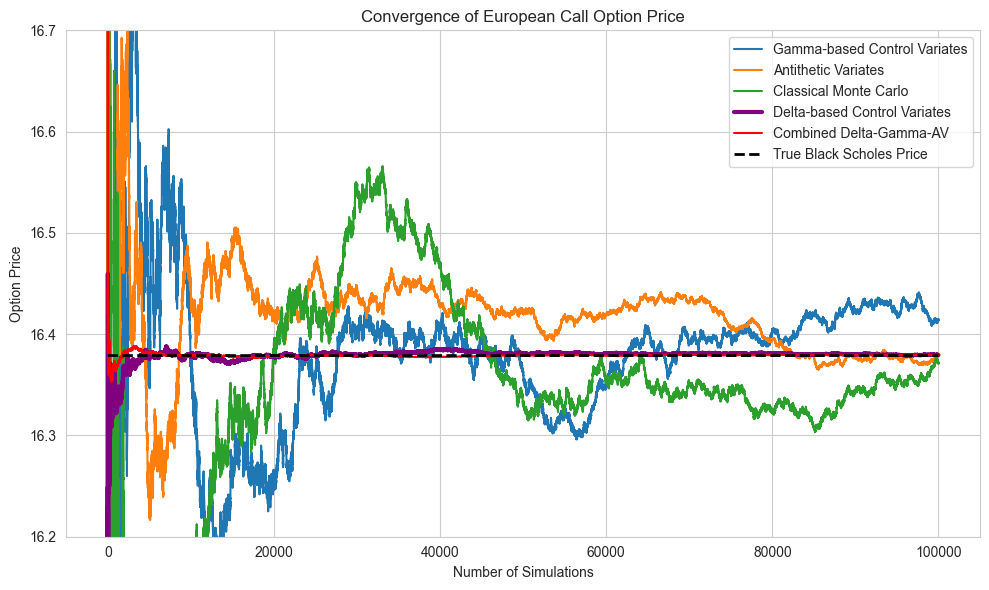

In [32]:

import seaborn as sns

# Set seaborn style and color palette
sns.set_style("whitegrid")
sns.set_palette("colorblind")

# Plot
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#800080', 'red']

# Plot
plt.figure(figsize=(10, 6))
plt.plot(cumulative_average_CV_gamma, label='Gamma-based Control Variates', color=custom_colors[0])
plt.plot(cumulative_average_AV, label='Antithetic Variates', color=custom_colors[1])
plt.plot(cumulative_average_MC, label='Classical Monte Carlo', color=custom_colors[2])
plt.plot(cumulative_average_CV_delta, label='Delta-based Control Variates', color=custom_colors[3],linewidth  = 3)
plt.plot(cumulative_average_all3, label = 'Combined Delta-Gamma-AV', color = custom_colors[4] )
plt.ylim(16.2, 16.7)

# Plot the true Black Scholes price line
y = [16.37889] * len(range(100001))
plt.plot(range(100001), y, label='True Black Scholes Price', alpha=1, color='black', linestyle = '--', linewidth=2)

plt.legend()
plt.title('Convergence of European Call Option Price')
plt.xlabel('Number of Simulations')
plt.ylabel('Option Price')

plt.tight_layout()
plt.show()

# Other Code / Plots 

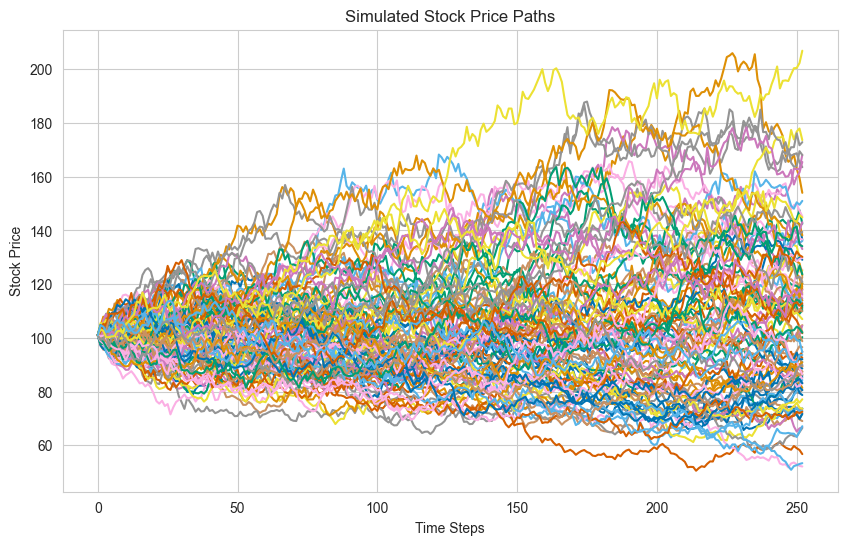

In [33]:
# Simple stock brownian motion iterations.

import numpy as np

# Parameters
S = 101  # Initial stock price
K = 100  # Strike price
T = 1    # Time to maturity
volatility = 0.30  # Volatility
r = 0.08  # Risk-free rate
num_steps = 252  # Number of steps
num_simulations = 100  # Number of simulations

# Time step
dt = T / num_steps

# Generate random numbers
random_numbers = np.random.normal(0, 1, size=(num_steps, num_simulations))

# Generate stock price paths
stock_paths = np.zeros((num_steps + 1, num_simulations))
stock_paths[0] = S

for i in range(1, num_steps + 1):
    stock_paths[i] = stock_paths[i - 1] * np.exp((r - 0.5 * volatility**2) * dt + volatility * np.sqrt(dt) * random_numbers[i - 1])

import matplotlib.pyplot as plt

# Plot stock price paths
plt.figure(figsize=(10, 6))
for i in range(num_simulations):
    plt.plot(np.arange(num_steps + 1), stock_paths[:, i])

plt.title('Simulated Stock Price Paths')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.grid(True)
plt.show()

